In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### The test lasted about 80 minutes. Look at the entire data set to make sure we have everything.
* We rotated the cart from 0 to 180 degrees, then back to 0. 0 means mirror facing down.
* To let things settle, we stopped at many positions, initially every 3.5 deg, then every 7 deg, sometimes even larger. We moved back with much fewer stops.
* More details here https://confluence.lsstcorp.org/display/LTS/M2+Testing+-+March+5th%2C+2020+-+4th+day+testing?preview=/127829188/127829233/M2_LUT_Test.pdf

In [2]:
start = Time('2020-03-05T14:32:00') #this is UTC
end = Time('2020-03-05T15:50:00') 

client = EfdClient('summit_efd')
csc_index = 1

In [3]:
dfa = await client.select_time_series('lsst.sal.MTM2.axialForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dfa.head()

,axialForceMeasured0,axialForceMeasured1,axialForceMeasured10,axialForceMeasured11,axialForceMeasured12,axialForceMeasured13,axialForceMeasured14,axialForceMeasured15,axialForceMeasured16,axialForceMeasured17,...,axialForceMeasured71,axialForceMeasured8,axialForceMeasured9,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp
2020-03-05 14:32:00.015000+00:00,186.776215,188.628586,189.084869,192.730103,187.868866,189.199692,187.759460,190.120575,191.065994,184.880493,...,252.062103,183.769974,184.415054,1,1.583419e+09,37859,1.583419e+09,f6f121a3,507672,1.583419e+09
2020-03-05 14:32:00.064000+00:00,186.705780,188.669235,189.120514,192.623795,187.828064,189.174332,187.769562,190.059540,191.010071,184.920944,...,252.177780,183.555862,184.394745,1,1.583419e+09,37859,1.583419e+09,f6f121a3,507681,1.583419e+09
2020-03-05 14:32:00.113000+00:00,186.680618,188.638748,189.120514,192.649109,187.812759,189.098251,187.764511,190.044281,191.035492,184.840057,...,252.258255,183.601746,184.374435,1,1.583419e+09,37859,1.583419e+09,f6f121a3,507690,1.583419e+09
2020-03-05 14:32:00.164000+00:00,186.670563,188.638748,189.140884,192.730103,187.822952,189.113464,187.754395,189.967987,190.994827,184.845108,...,252.243164,183.632324,184.516602,1,1.583419e+09,37859,1.583419e+09,f6f121a3,507699,1.583419e+09
2020-03-05 14:32:00.213000+00:00,186.730927,188.623489,189.120514,192.649109,187.817856,189.159103,187.774612,190.176529,190.999908,184.840057,...,252.202927,183.657822,184.455673,1,1.583419e+09,37859,1.583419e+09,f6f121a3,507708,1.583419e+09


In [4]:
len(dfa)

93600

0
5
10
15
20
25


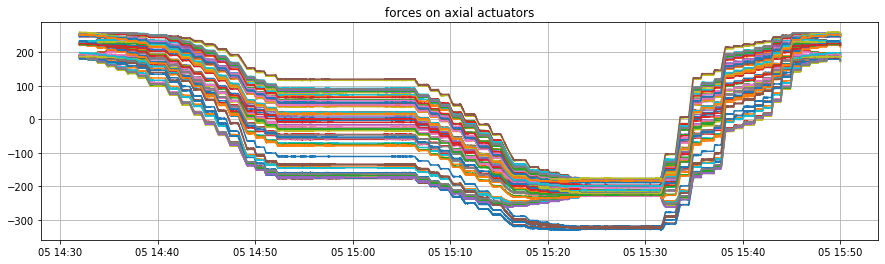

In [5]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(72):
    plt.plot(pd.to_datetime(dfa.private_sndStamp, unit='s'), dfa['axialForceMeasured%d'%i])
    if (min(dfa['axialForceMeasured%d'%i])<-300):
        print(i)
plt.title('forces on axial actuators')
plt.grid();

#### From above: (refer to 03_M2_correctability_analysis.pdf for page numbers below)
* cart going from 0 to 180, corresponds to LUT angle going from 90 to -90, or zenith angle going from 0 to 180.
* F_E is the minimal strain force set - the easier way to turn the mirror. Harris decided to let B1,6,11,16,21,26 do the heavy lifting (see page 29). These are ~1.5 x other B-ring forces.
* (F_E + F_0) is the nominal gravity force set - forces needed to turn a perfect M2 while maintaining it shape. F_0 is only needed from 90 to 0 (LUT angle). Beyond that we won't be observing. we want F_0 to be zero at -90 (LUT angle). To maintain continuity, F_0 begins to gradually phase out at 0 deg (LUT angle). Between 90 and 0, F_0 is constant. It is more negative on B1,6,11,16,21,26, so that (F_E + F_0) is the same for all B-ring actuators. (see page 29)

In [6]:
dft = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
dft.head()

,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,tangentLink0DegForceMeasured,tangentLink120DegForceMeasured,tangentLink180DegForceMeasured,tangentLink240DegForceMeasured,tangentLink300DegForceMeasured,tangentLink60DegForceMeasured
2020-03-05 14:32:00.018000+00:00,1,1.583419e+09,37859,1.583419e+09,b4501b3e,507675,1.583419e+09,38.886032,8.939526,-2.534915,32.271366,7.934876,-121.287895
2020-03-05 14:32:00.068000+00:00,1,1.583419e+09,37859,1.583419e+09,b4501b3e,507684,1.583419e+09,38.832176,9.585756,-2.642784,28.990442,5.721748,-118.866440
2020-03-05 14:32:00.117000+00:00,1,1.583419e+09,37859,1.583419e+09,b4501b3e,507693,1.583419e+09,38.132011,10.285839,-2.103440,27.484446,7.718962,-118.220718
2020-03-05 14:32:00.167000+00:00,1,1.583419e+09,37859,1.583419e+09,b4501b3e,507702,1.583419e+09,40.878807,8.670262,-4.260815,28.291229,7.017238,-118.220718
2020-03-05 14:32:00.216000+00:00,1,1.583419e+09,37859,1.583419e+09,b4501b3e,507711,1.583419e+09,40.717232,10.662807,-3.451799,29.474512,8.474664,-119.135490


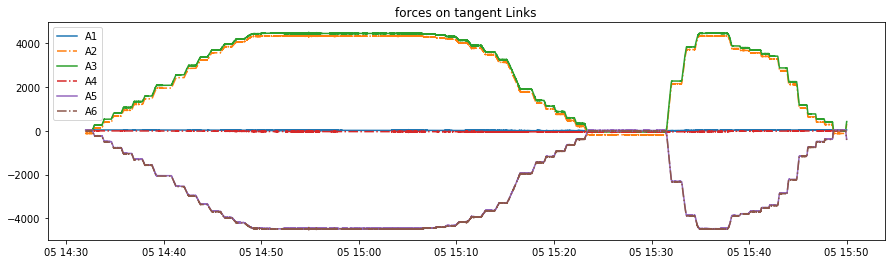

In [7]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(6):
    if np.mod(i,2) == 0:
        bb = '-'
    else:
        bb = '-.'
    plt.plot(pd.to_datetime(dft.private_sndStamp, unit='s'), 
             dft['tangentLink%dDegForceMeasured'%((i)*60)], bb,label='A%d'%(i+1))
plt.legend(loc='upper left')
plt.title('forces on tangent Links');

#### From above:
* A1 and A4 do not change - they are in parallel with the rotatin axis
* As A4 started to go toward the 3rd floor ceiling, A2 and A3 put out positive forces, A5 and A6 put out negative forces. All makes sense
* Gravity exerts forces on A2 and A6, because they are the hard points. A3 and A5 are their active helpers. They help off-load the forces on A2 and A6. We roughly have A3=A2, and A5=A6.

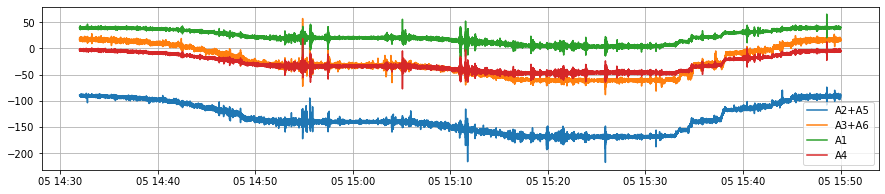

In [8]:
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(dft.tangentLink60DegForceMeasured + dft.tangentLink240DegForceMeasured, label='A2+A5')
plt.plot(dft.tangentLink120DegForceMeasured + dft.tangentLink300DegForceMeasured, label='A3+A6')
plt.plot(dft.tangentLink0DegForceMeasured, label = 'A1')
plt.plot(dft.tangentLink180DegForceMeasured, label='A4')
plt.legend(loc='lower right')
plt.grid();

In [9]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.zenithAngleMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

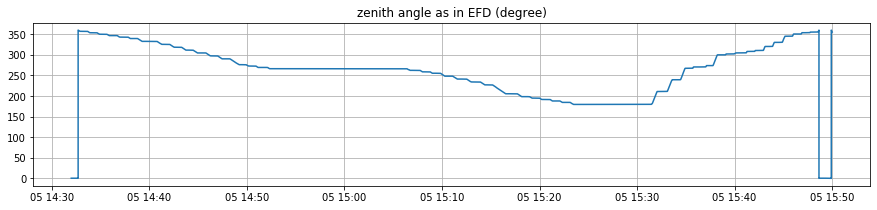

In [10]:
fig, ax = plt.subplots(figsize=(15,3))
lutAngle = np.array(df.zenithAngleMeasured/np.pi*180)
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), lutAngle )
plt.title('zenith angle as in EFD (degree)')
plt.grid()

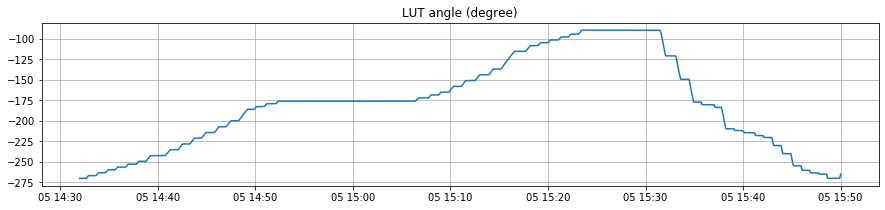

In [11]:
fig, ax = plt.subplots(figsize=(15,3))
#lutAngle increase opposite direction as zenithAngle, this is how we can match up the forces
# note: for example, B1 changes differently depending on A1 side goes up or A4 side goes up
#B1 going toward ceiling is lutAngle increasing from -270 degree to -180 degree.
lutAngle = np.array(-df.zenithAngleMeasured/np.pi*180+90) 
lutAngle[lutAngle>89] -= 360
plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), lutAngle )
plt.title('LUT angle (degree)')
plt.grid()

### Read out LUT from control software

In [12]:
ldfe = pd.read_csv('harrisLUT/FinalHandlingLUTs/F_E.csv')
FE = np.float64(ldfe)
ldf0 = pd.read_csv('harrisLUT/FinalHandlingLUTs/F_0.csv')
F0 = np.float64(ldf0)
ldff = pd.read_csv('harrisLUT/FinalHandlingLUTs/F_F.csv')
FF = np.float64(ldff)
ldfa = pd.read_csv('harrisLUT/FinalHandlingLUTs/F_A.csv')
FA = np.float64(ldfa)
lutInAngle = np.float64(ldfe.keys())
ldtr = pd.read_csv('harrisLUT/FinalHandlingLUTs/Tr.csv', header=None)
Tr = np.float64(ldtr)
ldtu = pd.read_csv('harrisLUT/FinalHandlingLUTs/Tu.csv', header=None)
Tu = np.float64(ldtu)
ldtx = pd.read_csv('harrisLUT/FinalHandlingLUTs/Tx.csv', header=None)
Tx = np.float64(ldtx)
ldty = pd.read_csv('harrisLUT/FinalHandlingLUTs/Ty.csv', header=None)
Ty = np.float64(ldty)

In [13]:
#73 columns, each column for one angle (-270 - 90)
print(FE.shape, F0.shape, FF.shape, FA.shape, Tr.shape, Tu.shape, Tx.shape, Ty.shape)
#FA (actuator weight component) is the only one that includes the tangent links. Why???

(72, 73) (72, 73) (72, 73) (78, 73) (72, 1) (72, 1) (72, 1) (72, 1)


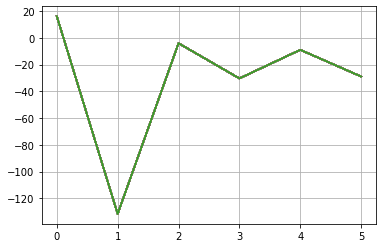

In [14]:
#and, FA has a value for each tangent link, which do not change with zenith angle.
plt.plot(FA[72:,:]);
plt.grid()

### We will check LUT force values at a few positions (zenith angle)
* 14 degrees - typical observing angle; we were stopping at every 3.5 degrees.
* 42 degrees - typical observing angle; we were stopping at every 7 degrees.
* 126 degrees - we stopped here as well. M2 had passed horizon pointing and was on its way going up. F_0 was decreasing.
* 45 degrees but on its way back. We did NOT stop there. We went from 50 to 40 degrees. This checks the forces while M2 was moving.

In [15]:
tempInv = np.loadtxt('harrisLUT/temp_inv.txt')
def lookUpForces(lutInAngle, FE, F0, FA, FF, Tr, Tx, Ty, Tu, tempInv, lutTheta, efdT):

    #Order temperature data based on a12_temperature.ipynb
    binT = efdT[[0,1,2,3, 12,15,14,13, 8,9,10,11, 4,5,6,7]]
    lutT = binT[ [1, 2, 3, 12, 9, 8, 13, 14, 15, 11, 10, 0]]
    tref = 21 #deg C. 
    tcoef = tempInv.dot(lutT-tref)
    
    myfe = np.zeros(72)
    myf0 = np.zeros(72)
    myfa = np.zeros(72)
    myff = np.zeros(72)
    for i in range(72):
        myfe[i] = np.interp(lutTheta, lutInAngle, FE[i,:])
        myf0[i] = np.interp(lutTheta, lutInAngle, F0[i,:])
        myfa[i] = np.interp(lutTheta, lutInAngle, FA[i,:])
        myff[i] = np.interp(lutTheta, lutInAngle, FF[i,:])
        myft = tcoef[0]*Tr + tcoef[1]*Tx + tcoef[2]*Ty + tcoef[3]*Tu
    myf = myfe + myf0 + myfa + myff + np.squeeze(myft)
    return myf

In [16]:
dftemp = await client.select_time_series('lsst.sal.MTM2.temperaturesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

## Look at 14 degree zenith angle first

In [61]:
zAngle = 14
aa =  -270 + zAngle
idx1 = np.argmax(abs(lutAngle-aa)<1)+400 #we went 15.6 deg/min, so 4s per 1deg. we give it 20s to get in position
lutTheta = lutAngle[idx1]
efdT1 = np.array([dftemp['temps%d'%i][idx1] for i in range(12)])
efdT2 = np.array([dftemp['intakeTemperatures%d'%i][idx1] for i in [0,1]])
efdT3 = np.array([dftemp['exhaustTemperatures%d'%i][idx1] for i in [0,1]])
efdT = np.concatenate((efdT1, efdT2, efdT3))
print('requested zAngle = %.1f, LUT angle = %.1f, actual LUT angle = %.1f'%(zAngle, aa, lutTheta))
myf = lookUpForces(lutInAngle, FE, F0, FA, FF, Tr, Tx, Ty, Tu, tempInv, lutTheta, efdT)

requested zAngle = 14.0, LUT angle = -256.0, actual LUT angle = -256.7


#### read in Binary data to compare

In [62]:
pd.to_datetime(df.private_sndStamp[idx1],unit='s')

Timestamp('2020-03-05 14:36:10.873126268')

In [63]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_134606_001.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
columns = [n for n, v in ndata.items()]
nonHP = [i for i in range(78) if i+1 not in ndata['hp'][0,:]]
nonHPa = [i for i in range(72) if i+1 not in ndata['hp'][0,:]] #a for axial actuator only

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    ii = 0
    for i in range(n2+6):
        if i in nonHP:
            b[:,i] = a[:,ii]
            ii += 1
        else:
            b[:,i] = 0
    return b

ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [64]:
t[60]

datetime.datetime(2020, 3, 5, 14, 36, 10, 580000)

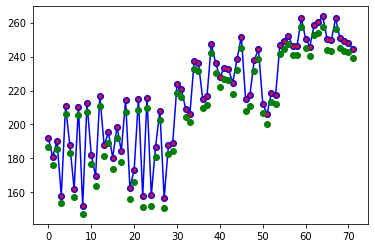

In [65]:
plt.plot(myf, '-bo')
plt.plot([dfa['axialForceMeasured%d'%i][idx1] for i in range(72)],'go')
plt.plot(ndata['f_cmd'][60,:72],'r.')

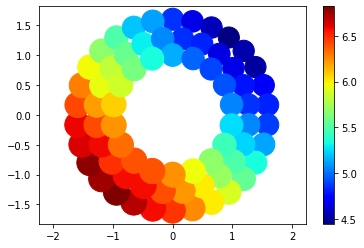

In [66]:
aa = np.loadtxt('../github/data/M2_1um_72_force.txt')
# to have +x going to right, and +y going up, we need to transpose and reverse x and y
xact = -aa[:,2]
yact = -aa[:,1]

aa = myf - np.array([dfa['axialForceMeasured%d'%i][idx1] for i in range(72)])
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.jet()
plt.axis('equal')
plt.colorbar();

In [80]:
def getFxyzMxyz(F, xact, yact, R_tangent):
    '''
    input: force vector with 78 force values
    output: net forces Fx,Fy,Fz, net moments Mx, My, Mz
    These are in M2 "visual" coordinate system: +Y points to B1, +X points to B8
    '''
    Fz = sum(F[:72])
    Fx = F[72] - F[75] + (F[73]-F[74]-F[76]+F[77])*0.5
    Fy = (-F[73]-F[74]+F[76]+F[77])*1.732/2
    Mx = sum(F[:72]*yact)
    My = sum(-F[:72]*xact)
    Mz = sum(F[72:])*R_tangent
    
    return [Fx, Fy, Fz, Mx, My, Mz]
R_tangent = 1.71 #use M2 outer radius for now; in meter
F72 = np.array([dfa['axialForceMeasured%d'%i][idx1] for i in range(72)])
F6 = np.array([dft['tangentLink%dDegForceMeasured'%(i*60)][idx1] for i in range(6)])
F78 = np.concatenate((F72,F6))
[Fx, Fy, Fz, Mx, My, Mz] = getFxyzMxyz(F78, xact,yact, R_tangent)
print('%.2f, %.2f, %.2f, %.2f, %.2f, %.2f'%(Fx, Fy, Fz, Mx, My, Mz))

-31.44, -3538.81, 15153.69, -236.49, -23.35, -76.03


In [90]:
aas = np.sin(lutTheta/180*np.pi)
aac = -np.cos(lutTheta/180*np.pi)
print(np.cos(14/180*np.pi), aas, aac)
#at zenith, all actuators put out this (values from a01*.ipynb)
FxyzMxyz_0 = np.array([-36.51, 122.97, 15578.48, 60.73, -28.49, -58.62])
#at zenith, gravity vector puts out this
bb = -FxyzMxyz_0
#at current zenith angle, gravity vector puts out. 
#Note that These are in M2 "visual" coordinate system: +Y points to B1, +X points to B8
cc = [bb[0], bb[1]*aas-bb[2]*aac ,bb[1]*aac+bb[2]*aas, bb[3]*aas, bb[4]*aas, bb[5]*aas]
# if we apply the LUT forces, the net forces and moments
#dd = cc + np.array(getFxyzMxyz(np.concatenate((myf, np.zeros(6))), xact,yact,R_tangent))
print(cc)
#do the expected forces and moments created by gravity cancel those created by the actuators???
print(cc+np.array([Fx, Fy, Fz, Mx, My, Mz]))

0.9702957262759965 0.9731427224358684 0.23020261025910727
[36.51, 3466.5393992913587, -15188.392453596289, -59.09895753353029, 27.72483616219789, 57.0456263891906]
[   5.06721045  -72.27340198  -34.7072119  -295.58695773    4.37787038
  -18.98141154]


What we think the gravity vector will put out now is not the negative of everything put out by the actuators, which means there is probably other complications with actuator weights etc.

The LUT does work the way we expect it too.

## Zenith angle = 42

requested zAngle = 42.0, LUT angle = -228.0, actual LUT angle = -228.5


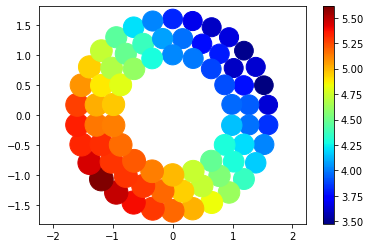

In [33]:
zAngle = 42
aa =  -270 + zAngle
idx1 = np.argmax(abs(lutAngle-aa)<1)+400 #we went 15.6 deg/min, so 4s per 1deg. we give it 20s to get in position
lutTheta = lutAngle[idx1]
efdT1 = np.array([dftemp['temps%d'%i][idx1] for i in range(12)])
efdT2 = np.array([dftemp['intakeTemperatures%d'%i][idx1] for i in [0,1]])
efdT3 = np.array([dftemp['exhaustTemperatures%d'%i][idx1] for i in [0,1]])
efdT = np.concatenate((efdT1, efdT2, efdT3))
print('requested zAngle = %.1f, LUT angle = %.1f, actual LUT angle = %.1f'%(zAngle, aa, lutTheta))
myf = lookUpForces(lutInAngle, FE, F0, FA, FF, Tr, Tx, Ty, Tu, tempInv, lutTheta, efdT)

aa = myf - np.array([dfa['axialForceMeasured%d'%i][idx1] for i in range(72)])
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.jet()
plt.axis('equal')
plt.colorbar();

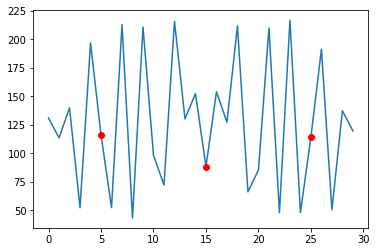

In [37]:
plt.plot(np.array([dfa['axialForceMeasured%d'%i][idx1] for i in range(30)]))
plt.plot([5,15,25],np.array([dfa['axialForceMeasured%d'%i][idx1] for i in [5,15,25]]), 'ro');

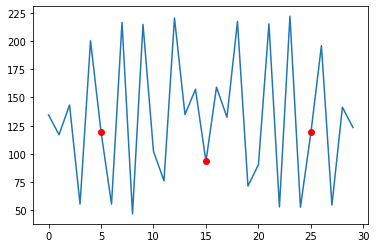

In [38]:
plt.plot(myf[:30])
plt.plot([5,15,25],myf[[5,15,25]], 'ro');

## Zenith angle = 126

requested zAngle = 126.0, LUT angle = -144.0, actual LUT angle = -144.2


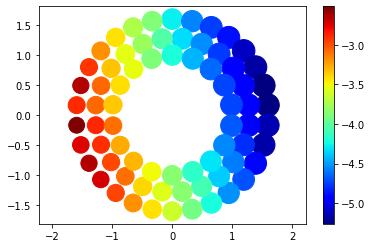

In [24]:
zAngle = 126
aa =  -270 + zAngle
idx1 = np.argmax(abs(lutAngle-aa)<1)+400 #we went 15.6 deg/min, so 4s per 1deg. we give it 20s to get in position
lutTheta = lutAngle[idx1]
efdT1 = np.array([dftemp['temps%d'%i][idx1] for i in range(12)])
efdT2 = np.array([dftemp['intakeTemperatures%d'%i][idx1] for i in [0,1]])
efdT3 = np.array([dftemp['exhaustTemperatures%d'%i][idx1] for i in [0,1]])
efdT = np.concatenate((efdT1, efdT2, efdT3))
print('requested zAngle = %.1f, LUT angle = %.1f, actual LUT angle = %.1f'%(zAngle, aa, lutTheta))
myf = lookUpForces(lutInAngle, FE, F0, FA, FF, Tr, Tx, Ty, Tu, tempInv, lutTheta, efdT)

aa = myf - np.array([dfa['axialForceMeasured%d'%i][idx1] for i in range(72)])
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.jet()
plt.axis('equal')
plt.colorbar();

## Zenith angle = 45 (on the way back)

requested zAngle = 45.0, LUT angle = -225.0, actual LUT angle = -225.0


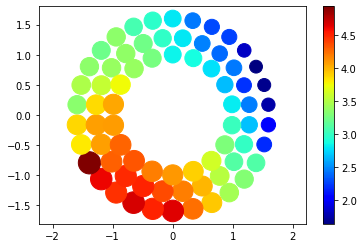

In [25]:
zAngle = 45
aa =  -270 + zAngle
idx1 = len(lutAngle) - np.argmax(abs(lutAngle[::-1]-aa)<1)-20#return speed was 60deg/min, so 1s per 1deg. we give it 20s to get in position
lutTheta = lutAngle[idx1]
efdT1 = np.array([dftemp['temps%d'%i][idx1] for i in range(12)])
efdT2 = np.array([dftemp['intakeTemperatures%d'%i][idx1] for i in [0,1]])
efdT3 = np.array([dftemp['exhaustTemperatures%d'%i][idx1] for i in [0,1]])
efdT = np.concatenate((efdT1, efdT2, efdT3))
print('requested zAngle = %.1f, LUT angle = %.1f, actual LUT angle = %.1f'%(zAngle, aa, lutTheta))
myf = lookUpForces(lutInAngle, FE, F0, FA, FF, Tr, Tx, Ty, Tu, tempInv, lutTheta, efdT)

aa = myf - np.array([dfa['axialForceMeasured%d'%i][idx1] for i in range(72)])
plt.scatter(xact, yact, c=aa, s=abs(aa)*100)
plt.jet()
plt.axis('equal')
plt.colorbar();

#### read in Binary data to compare

In [26]:
pd.to_datetime(df.private_sndStamp[idx1],unit='s')

Timestamp('2020-03-05 15:43:01.390764236')

In [27]:
mat = scipy.io.loadmat('mat/0305/CellTelemetry_2020-03-05_134606_002.mat')
print(mat['data'].dtype.names)
mdata = mat['data']  # variable in mat file
mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
ndata = {n: mdata[n][0, 0] for n in mdtype.names}
t = [datetime.strptime(ts[0][0], '%d-%b-%Y %H:%M:%S.%f') for ts in ndata['timestamp']]
t = np.array([ti+ timedelta(hours=4, minutes=3, seconds=-5) for ti in t]) #convert to utc, 4 hours ahead of Rochester
columns = [n for n, v in ndata.items()]
nonHP = [i for i in range(78) if i+1 not in ndata['hp'][0,:]]
nonHPa = [i for i in range(72) if i+1 not in ndata['hp'][0,:]] #a for axial actuator only

def insertHPColumns(a):
    [n1, n2] = a.shape
    b = np.zeros((n1, n2+6))
    ii = 0
    for i in range(n2+6):
        if i in nonHP:
            b[:,i] = a[:,ii]
            ii += 1
        else:
            b[:,i] = 0
    return b

ndata['f_hp'] = insertHPColumns(ndata['f_hp'])
ndata['f_error'] = insertHPColumns(ndata['f_error'])

('time_delta', 'comm_cntr', 'ilc_status', 'encoder', 'force', 'disp_sensors', 'temp_sensors', 'inclinometer', 'step_cmd', 'inc_cal', 'elevation_ts_i', 'elevation_ts_u', 'elevation_ang', 'el_status', 'disp_proc', 'disp_status', 'temp_proc', 'temp_status', 'hp', 'f_e', 'f_0', 'f_a', 'f_f', 'T_u', 'T_x', 'T_y', 'T_r', 'f_hp', 'f_cmd', 'f_error', 'f_delta', 'f_cmd_wrd', 'mtr_voltage', 'comm_voltage', 'mtr_current', 'comm_current', 'dig_input', 'dig_output', 'mtr_voltage_proc', 'comm_voltage_proc', 'mtr_current_proc', 'comm_current_proc', 'time', 'timestamp')


In [28]:
t[0]

datetime.datetime(2020, 3, 5, 15, 26, 7, 580000)

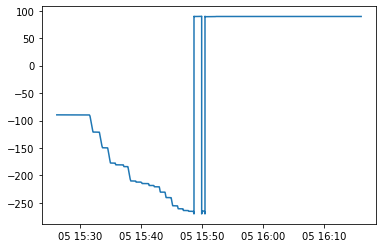

In [29]:
plt.plot(t, ndata['inc_cal']/np.pi*180); #compare this with plot above (LUT angle), it is the same. Good.

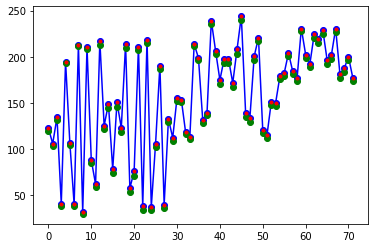

In [30]:
idx2 = np.argmax(abs(ndata['inc_cal']/np.pi*180-(-270+45))<1)+18
plt.plot(myf, '-bo')
plt.plot([dfa['axialForceMeasured%d'%i][idx1] for i in range(72)],'go')
plt.plot(ndata['f_cmd'][idx2,:72],'r.')

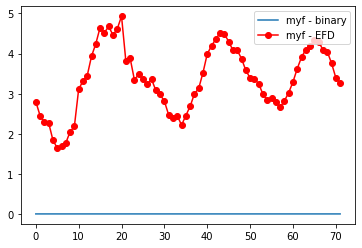

In [31]:
plt.plot(myf - ndata['f_cmd'][idx2,:72], label ='myf - binary')
plt.plot(myf - [dfa['axialForceMeasured%d'%i][idx1] for i in range(72)],'-ro', label='myf - EFD')
plt.legend();

In [32]:
print(lutTheta, ndata['inc_cal'][idx2][0]/np.pi*180)

-224.98299926757812 -224.98299926757812
